In [1]:
import pandas as pd
import numpy as np
from dataloading import DataLoader
from eda_py import EDA
from eALS_adaptor import eALSAdaptor
from implicit.evaluation import train_test_split, ranking_metrics_at_k
from cv_py import CrossValidation
from visualize_py import Visualize

%cd C:\Users\781110104\OneDrive - Genpact\Documents\VSCode

C:\Users\781110104\OneDrive - Genpact\Documents\VSCode


In [2]:
dl = DataLoader()

In [3]:
user_item_co = dl.import_data('AGCO', 'CO', 'df')
user_item_co_t = dl.import_data('TEREX', 'CO', 'df')

In [4]:
user_item_filtered = dl.remove_low_interact_items(user_item_co, 1)
user_item_filtered_t = dl.remove_low_interact_items(user_item_co_t, 1)

In [5]:
user_item_filtered_log = dl.log_scale_df(user_item_filtered, 0.01)
user_item_filtered_log_t = dl.log_scale_df(user_item_filtered_t, 0.01)

In [6]:
user_item_csr = dl.to_csr(user_item_filtered_log)
user_item_csr_t = dl.to_csr(user_item_filtered_log_t)

In [7]:
# initial split
train, test = train_test_split(user_item_csr, 0.8, 22)
train_t, test_t = train_test_split(user_item_csr_t, 0.8, 22)

In [8]:
cv = CrossValidation(train, 5)
cv_t = CrossValidation(train_t, 5)

In [12]:
validate, calibrate = cv.split_k_fold(22)
validate_t, calibrate_t = cv_t.split_k_fold(22)

In [61]:
#space_iALS = {'factors' : [64], 'regularization' : [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 140, 160], 'alpha' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'iterations' : [15]}
space_iALS_t = {'factors' : [64], 'regularization' : [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 140, 160], 'alpha' : [0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], 'iterations' : [15]}
#hyper_ials = cv.hyperp_tuning(test=validate, train=calibrate, exclude=test, seed=22, param_space=space_iALS, model_class='iALS')
hyper_ials_t = cv.hyperp_tuning(test=validate_t, train=calibrate_t, exclude=test_t, seed=22, param_space=space_iALS_t, model_class='iALS')

In [39]:
space_eALS_t = {'factors' : [64], 'regularization' : [0.5, 0.7, 1, 1.2, 1.7, 2, 3], 'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1], 
'w0' : [40, 50, 60, 70, 80, 90, 100]}
hyper_eals_t = cv_t.hyperp_tuning(test=validate_t, train=calibrate_t, exclude=test_t, seed=22, param_space=space_eALS_t, model_class='eALS')

converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items t

In [130]:
space_eALS_t = {'factors' : [64], 'regularization' : [4, 5, 6, 7, 8], 'alpha' : [0.005, 0.01], 
'w0' : [250, 300, 350]}
hyper_eals_t_add = cv_t.hyperp_tuning(test=validate_t, train=calibrate_t, exclude=test_t, seed=22, param_space=space_eALS_t, model_class='eALS')

converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items t

In [169]:
space_eALS_t = {'factors' : [64], 'regularization' : [0.1, 0.5, 1, 5, 10], 'alpha' : [0.001, 0.01, 0.1, 1, 10], 
'w0' : [1, 10, 50, 100, 200, 300, 500, 750, 1000, 5000]}
hyper_eals_t_wide = cv_t.hyperp_tuning(test=validate_t, train=calibrate_t, exclude=test_t, seed=22, param_space=space_eALS_t, model_class='eALS')

converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items t

In [208]:
space_eALS_t = {'factors' : [64], 'regularization' : [50], 'alpha' : [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 
'w0' : [10000]}
hyper_eals_t_wide_add = cv_t.hyperp_tuning(test=validate_t, train=calibrate_t, exclude=test_t, seed=22, param_space=space_eALS_t, model_class='eALS')

converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items t

In [209]:
hyper_eals_t_wide = pd.concat([hyper_eals_t_wide, hyper_eals_t_wide_add], axis=0)

In [217]:
hyper_eals_t_wide.sort_values(by=['mpr'], ascending=True).head(20)

,factors,regularization,alpha,w0,precision,map,ndcg,auc,mpr
78,64,30.0,1.0,500,0.5120,0.387703,0.531971,0.514408,0.117240
77,64,30.0,1.0,300,0.4905,0.369147,0.516852,0.513740,0.117515
79,64,30.0,1.0,750,0.5050,0.384143,0.526895,0.514113,0.117638
211,64,10.0,1.0,200,0.4890,0.369737,0.510932,0.513367,0.117652
175,64,50.0,1.0,750,0.5160,0.401139,0.546954,0.514517,0.117685
176,64,50.0,1.0,1000,0.5210,0.403346,0.545687,0.514629,0.117695
35,64,20.0,1.0,300,0.4970,0.375220,0.519463,0.513858,0.117798
212,64,10.0,1.0,300,0.4775,0.357883,0.497456,0.513174,0.117843
80,64,30.0,1.0,1000,0.4935,0.374805,0.514598,0.513739,0.118022
165,64,5.0,1.0,100,0.4890,0.366293,0.506043,0.513438,0.118031


In [218]:
hyper_eals_t_wide.to_csv('eals_tuning_final.csv')

In [131]:
hyper_eals_t_d = pd.concat([hyper_eals_t_d, hyper_eals_t_add], axis=0)

In [132]:
hyper_eals_t_d.sort_values(by=['precision'], ascending=False).head(10)

,factors,regularization,alpha,w0,precision,map,ndcg,auc,mpr
11,64,5.0,0.010,350,0.5595,0.445076,0.581604,0.515653,0.122182
8,64,5.0,0.005,350,0.5595,0.444980,0.581681,0.515661,0.122215
7,64,5.0,0.005,300,0.5590,0.443949,0.580458,0.515633,0.121669
10,64,5.0,0.010,300,0.5585,0.443692,0.580044,0.515618,0.121637
0,64,4.0,0.005,250,0.5585,0.447504,0.583298,0.515689,0.122147
3,64,4.0,0.010,250,0.5585,0.447361,0.583219,0.515689,0.122117
31,64,5.0,0.010,200,0.5565,0.438563,0.577574,0.515498,0.120557
9,64,5.0,0.010,250,0.5560,0.441714,0.577312,0.515567,0.121094
29,64,8.0,0.010,350,0.5560,0.442012,0.580210,0.515491,0.120709
26,64,8.0,0.005,350,0.5560,0.442026,0.580273,0.515491,0.120739


<AxesSubplot:>

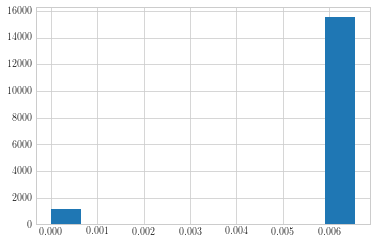

In [168]:
alpha = 0.01
w0 = 100

p = calibrate_t['0'].getnnz(axis=0)
p = (p / p.sum()) ** alpha
Wi = p / p.sum() * w0
pd.Series(Wi).hist()

In [162]:
pd.Series(calibrate_t['0'].data).describe()

count    38983.000000
mean         6.118298
std          1.416396
min          4.615121
25%          5.303305
50%          5.993961
75%          6.908755
max         14.855470
dtype: float64

In [87]:
hyper_eals_t_c.sort_values(by=['precision'], ascending=False).head(10)

,factors,regularization,alpha,w0,precision,map,ndcg,auc,mpr
6,64,4.0,0.1,100,0.5320,0.420450,0.558990,0.514820,0.119542
27,64,4.0,0.4,100,0.5305,0.419060,0.557759,0.514792,0.118562
20,64,4.0,0.3,100,0.5305,0.419983,0.558247,0.514619,0.118827
13,64,4.0,0.2,100,0.5300,0.419262,0.557363,0.514700,0.119158
12,64,4.0,0.2,90,0.5275,0.413789,0.552243,0.514545,0.119105
34,64,4.0,0.5,100,0.5270,0.412865,0.553535,0.514843,0.118371
76,64,5.0,0.3,100,0.5265,0.409933,0.550586,0.514561,0.117970
25,64,4.0,0.4,80,0.5260,0.410655,0.550763,0.514607,0.118561
19,64,4.0,0.3,90,0.5260,0.413569,0.551702,0.514536,0.118788
18,64,4.0,0.3,80,0.5255,0.411167,0.550442,0.514457,0.118784


In [86]:
hyper_eals_t.sort_values(by=['precision'], ascending=False).head(10)

,factors,regularization,alpha,w0,precision,map,ndcg,auc,mpr
347,64,3.0,0.2,80,0.5120,0.391361,0.538820,0.514398,0.125756
339,64,3.0,0.1,70,0.5085,0.392703,0.537853,0.513979,0.125784
361,64,3.0,0.4,80,0.5085,0.387986,0.534820,0.514454,0.124844
360,64,3.0,0.4,70,0.5080,0.390871,0.536008,0.514078,0.124153
340,64,3.0,0.1,80,0.5075,0.388192,0.535924,0.514290,0.126355
341,64,3.0,0.1,90,0.5075,0.387769,0.534151,0.513994,0.127172
342,64,3.0,0.1,100,0.5075,0.389987,0.535248,0.513904,0.128196
353,64,3.0,0.3,70,0.5075,0.389806,0.536463,0.514115,0.124608
362,64,3.0,0.4,90,0.5070,0.385613,0.530919,0.514077,0.125941
354,64,3.0,0.3,80,0.5070,0.389703,0.536516,0.514219,0.125232


In [98]:
space_BPR = {'factors' : [64], 'regularization' : [0.005], 'learning_rate' : [0.001, 0.003, 0.005, 0.007, 0.01, 0.015, 0.02, 0.03, 0.05], 'iterations' : [15]}
hyper_bpr_add = cv.hyperp_tuning(test=validate, train=calibrate, exclude=test, seed=22, param_space=space_BPR, model_class='BPR')

In [99]:
hyper_bpr_c = pd.concat([hyper_bpr_c, hyper_bpr_add], axis=0)

In [100]:
hyper_bpr_c.sort_values(by=['mpr'], ascending=True).head(10)

,factors,regularization,learning_rate,iterations,precision,map,ndcg,auc,mpr
4,64,0.010,0.020,15,0.536832,0.415438,0.552576,0.502834,0.160403
13,64,0.030,0.050,15,0.466007,0.338324,0.480668,0.502419,0.161748
3,64,0.010,0.015,15,0.574191,0.462174,0.589466,0.502943,0.161879
5,64,0.010,0.030,15,0.501518,0.368222,0.515652,0.502746,0.164430
12,64,0.030,0.030,15,0.543828,0.431158,0.559403,0.502650,0.167165
5,64,0.005,0.015,15,0.523300,0.398389,0.539866,0.502786,0.167343
4,64,0.005,0.010,15,0.560132,0.448112,0.574308,0.502798,0.168258
2,64,0.010,0.010,15,0.589241,0.487220,0.602739,0.502866,0.170791
6,64,0.005,0.020,15,0.504686,0.371379,0.518637,0.502773,0.172679
6,64,0.010,0.050,15,0.456436,0.320949,0.474622,0.502602,0.175332


In [170]:
space_LMF = {'factors' : [64], 'regularization' : [1, 5, 10], 'learning_rate' : [0.7, 1.0, 1.2], 'iterations' : [15], 'neg_prop': [90, 100, 110, 120, 130]}
hyper_lmf_add = cv.hyperp_tuning(test=validate, train=calibrate, exclude=test, seed=22, param_space=space_LMF, model_class='LMF')

In [220]:
hyper_lmf = pd.concat([hyper_lmf, hyper_lmf_add], axis=0)

In [222]:
hyper_lmf.sort_values(by=['mpr'], ascending=True).head(10)

,factors,regularization,learning_rate,iterations,neg_prop,precision,map,ndcg,auc,mpr
35,64,10,1.0,15,90,0.490033,0.366058,0.511444,0.502553,0.203553
36,64,10,1.0,15,100,0.490033,0.366058,0.511444,0.502553,0.203553
37,64,10,1.0,15,110,0.490033,0.366058,0.511444,0.502553,0.203553
38,64,10,1.0,15,120,0.490033,0.366058,0.511444,0.502553,0.203553
39,64,10,1.0,15,130,0.490033,0.366058,0.511444,0.502553,0.203553
7,64,10,1.0,15,70,0.490033,0.366058,0.511444,0.502553,0.203553
8,64,10,1.0,15,80,0.490033,0.366058,0.511444,0.502553,0.203553
6,64,10,1.0,15,60,0.489109,0.368219,0.512043,0.502536,0.206014
14,64,20,0.7,15,80,0.482772,0.361948,0.501952,0.502540,0.207348
13,64,20,0.7,15,70,0.482772,0.361948,0.501952,0.502540,0.207348


In [223]:
hyper_lmf.to_csv('lmf_tuning_final.csv')

In [79]:
hyper_lmf[hyper_lmf.neg_prop == 50]

,factors,regularization,learning_rate,iterations,neg_prop,precision,map,ndcg,auc,mpr
35,64,40,0.5,15,20,0.225545,0.120202,0.233832,0.501249,0.271306
36,64,40,0.5,15,30,0.223564,0.118195,0.231049,0.501197,0.248636
37,64,40,0.5,15,40,0.228449,0.117518,0.234283,0.501256,0.239379
38,64,40,0.5,15,50,0.240792,0.125605,0.243622,0.501287,0.234303
39,64,40,0.5,15,60,0.241716,0.130455,0.249703,0.501320,0.230517
40,64,40,0.7,15,20,0.312013,0.180069,0.315326,0.501722,0.299175
41,64,40,0.7,15,30,0.328515,0.188648,0.324816,0.501790,0.262117
42,64,40,0.7,15,40,0.341584,0.200473,0.340839,0.501872,0.246126
43,64,40,0.7,15,50,0.348713,0.212735,0.350292,0.501879,0.237530
44,64,40,0.7,15,60,0.363696,0.224754,0.366252,0.501976,0.230490


In [80]:
vis.get_heatmap(hyper_lmf[hyper_lmf.neg_prop == 50], 'LMF', save=False)

UnboundLocalError: local variable 'heatmap_df' referenced before assignment

In [21]:
space_iALS_t = {'factors' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], 'regularization' : [60], 'alpha' : [0.2], 'iterations' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
hyper_ials_t = cv_t.hyperp_tuning_simple(test=test_t, train=train_t, seed=22, param_space=space_iALS_t, model_class='iALS')

In [16]:
hyper_ials_t

,factors,regularization,alpha,iterations,precision,map,ndcg,auc,mpr
0,10,60,0.2,1,0.0375,0.016571,0.044718,0.501097,0.397860
1,10,60,0.2,2,0.0625,0.021567,0.057038,0.501162,0.396645
2,10,60,0.2,3,0.0700,0.030606,0.068564,0.501008,0.396316
3,10,60,0.2,4,0.0925,0.051304,0.094920,0.501301,0.391601
4,10,60,0.2,5,0.2575,0.201694,0.281677,0.505635,0.338602
...,...,...,...,...,...,...,...,...,...
95,100,60,0.2,6,0.2700,0.211576,0.295432,0.505527,0.177974
96,100,60,0.2,7,0.2900,0.219759,0.313188,0.506197,0.161482
97,100,60,0.2,8,0.3350,0.242201,0.357209,0.507407,0.159856
98,100,60,0.2,9,0.4300,0.323775,0.466145,0.510095,0.157008


In [26]:
df = hyper_ials_t.pivot(index= 'factors', columns= 'iterations', values= 'precision')

In [23]:
df

factors,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150
iterations,,,,,,,,,,,,,,,
1,0.0375,0.0475,0.0525,0.0550,0.0550,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500
2,0.0625,0.0625,0.0625,0.0675,0.0675,0.0700,0.0700,0.0700,0.0700,0.0700,0.0725,0.0700,0.0725,0.0725,0.0725
3,0.0700,0.0800,0.0800,0.0800,0.0825,0.0900,0.0925,0.0925,0.0925,0.1025,0.1050,0.1025,0.1025,0.1075,0.1075
4,0.0925,0.1625,0.1450,0.1900,0.2025,0.2475,0.2650,0.2675,0.2625,0.2700,0.2725,0.2700,0.2725,0.2750,0.2775
5,0.2575,0.2775,0.2775,0.2675,0.2725,0.2675,0.2700,0.2725,0.2675,0.2625,0.2650,0.2675,0.2700,0.2650,0.2650
6,0.2650,0.2600,0.2600,0.2625,0.2625,0.2625,0.2625,0.2650,0.2625,0.2700,0.2700,0.2725,0.2775,0.2725,0.2725
7,0.2600,0.2625,0.2625,0.2650,0.2775,0.2725,0.2800,0.2825,0.2800,0.2900,0.2900,0.3050,0.3075,0.3075,0.2900
8,0.2625,0.2750,0.2725,0.2900,0.3125,0.2900,0.3250,0.3250,0.3175,0.3350,0.3400,0.3575,0.3650,0.3625,0.3425
9,0.2625,0.3075,0.3050,0.3325,0.3775,0.3400,0.4000,0.4075,0.3825,0.4300,0.4350,0.4675,0.4750,0.4725,0.4425


<AxesSubplot:xlabel='factors'>

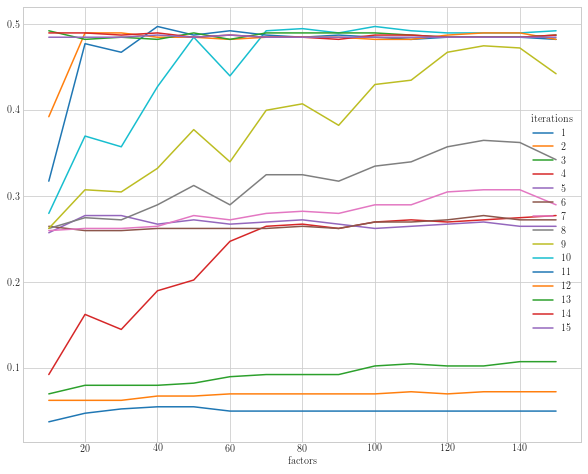

In [27]:
df.plot(figsize=(10, 8))